# Questão 4. Análise Financeira
# a. Análise de Lucratividade por Categoria: Calcular a lucratividade de diferentes
# categorias de produtos, levando em conta o custo dos produtos e o preço de venda

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
categoria = pd.read_csv("bases/olist_products_dataset.csv")
produtos = pd.read_csv("bases/olist_order_items_dataset.csv")

In [3]:
produtos[produtos['order_id'] == '1f78449c87a54faf9e96e88ba1491fa9']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
13835,1f78449c87a54faf9e96e88ba1491fa9,1,ef59f328cef34c7b309bb12e86b6418b,4d232b78ab7ef10393dc3807d827bc0d,2018-07-27 09:18:40,269.0,72.09


In [4]:
categoria_clone = categoria[['product_id', 'product_category_name']]
produtos_clone = produtos[['product_id', 'price']]
produtos_clone.head()

,product_id,price
0,4244733e06e7ecb4970a6e2683c13e61,58.90
1,e5f2d52b802189ee658865ca93d83a8f,239.90
2,c777355d18b72b67abbeef9df44fd0fd,199.00
3,7634da152a4610f1595efa32f14722fc,12.99
4,ac6c3623068f30de03045865e4e10089,199.90


In [5]:
produtos_clone.isnull().sum()

product_id    0
price         0
dtype: int64

In [6]:
categoria_clone.loc[:,'product_category_name'] = categoria_clone['product_category_name'].fillna('NAO DEFINIDA')
#categoria_X = categoria_clone[categoria_clone['product_id'] == 'd8dee61c2034d6d075997acef1870e9b']
#categoria_X.head()

In [7]:
categoria_clone.isnull().sum()

product_id               0
product_category_name    0
dtype: int64

In [8]:
categoria_clone[categoria_clone['product_category_name'] == 'NAO DEFINIDA']

,product_id,product_category_name
105,a41e356c76fab66334f36de622ecbd3a,NAO DEFINIDA
128,d8dee61c2034d6d075997acef1870e9b,NAO DEFINIDA
145,56139431d72cd51f19eb9f7dae4d1617,NAO DEFINIDA
154,46b48281eb6d663ced748f324108c733,NAO DEFINIDA
197,5fb61f482620cb672f5e586bb132eae9,NAO DEFINIDA
...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NAO DEFINIDA
32589,10dbe0fbaa2c505123c17fdc34a63c56,NAO DEFINIDA
32616,bd2ada37b58ae94cc838b9c0569fecd8,NAO DEFINIDA
32772,fa51e914046aab32764c41356b9d4ea4,NAO DEFINIDA


In [9]:
produto_Categoria = produtos_clone.merge(categoria_clone, on="product_id", how="inner")
produto_Categoria.head(10)

,product_id,price,product_category_name
0,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff
1,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop
2,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao
3,7634da152a4610f1595efa32f14722fc,12.99,perfumaria
4,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim
5,ef92defde845ab8450f9d70c526ef70f,21.90,utilidades_domesticas
6,8d4f2bb7e93e6710a28f34fa83ee7d28,19.90,telefonia
7,557d850972a7d6f792fd18ae1400d9b6,810.00,ferramentas_jardim
8,310ae3c140ff94b03219ad0adc3c778f,145.95,beleza_saude
9,4535b0e1091c278dfd193e5a1d63b39f,53.99,livros_tecnicos


In [10]:
for i in produto_Categoria.columns[0:3].tolist():
    print(i, ':', len(produto_Categoria[i].astype(str).value_counts()))

product_id : 32951
price : 5968
product_category_name : 74


In [11]:
soma_por_categoria = produto_Categoria.groupby('product_category_name')['price'].sum()
produto_Categoria = produto_Categoria.merge(soma_por_categoria, on='product_category_name', how='inner')

produto_Categoria.head()

,product_id,price_x,product_category_name,price_y
0,4244733e06e7ecb4970a6e2683c13e61,58.90,cool_stuff,635290.85
1,e5f2d52b802189ee658865ca93d83a8f,239.90,pet_shop,214315.41
2,c777355d18b72b67abbeef9df44fd0fd,199.00,moveis_decoracao,729762.49
3,7634da152a4610f1595efa32f14722fc,12.99,perfumaria,399124.87
4,ac6c3623068f30de03045865e4e10089,199.90,ferramentas_jardim,485256.46


C:\Users\willi.WILL\AppData\Local\Temp\ipykernel_10040\3054656413.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


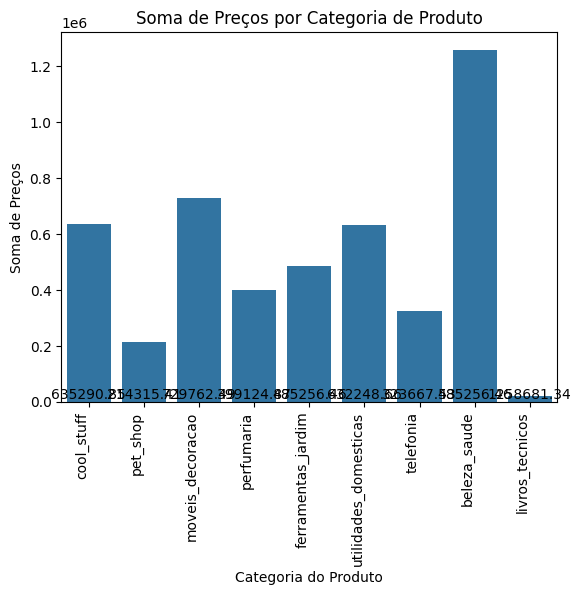

In [31]:
df = pd.DataFrame(produto_Categoria)

max_bars = 10
ax = sns.barplot(x='product_category_name', y='price_y', data=df.head(max_bars))
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')

# Anotar os valores acima das barras
for index, row in df.iterrows():
    ax.annotate(f'{row["price_y"]:.2f}',  # formatando para duas casas decimais
                xy=(index, row["price_x"]),  # use index para a posição x e price_x para y
                ha='center', va='bottom')

plt.xlabel('Categoria do Produto')
plt.ylabel('Soma de Preços')
plt.title('Soma de Preços por Categoria de Produto')

# Mostrar o gráfico
plt.show()